In [1]:
import os
import statistics
from typing import Dict, Tuple
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def load_csf_result_data(optimization, scenario, variant_counts, row_count):
    result_df = None
    for variant_count in variant_counts:
        filepath = f"./optimization-benchmark-results/" \
                   f"results-{optimization}-{scenario}-{variant_count}-{row_count}.csv"
        new_df = pd.read_csv(filepath)
        repeats = new_df.shape[0]
        median_no_opt = new_df['analysis_result_without_any_opt'].median()
        avg_baseline_variant_execution = median_no_opt / variant_count
        new_df['original_pipeline'] = new_df['original_pipeline'].median()
        for column in new_df.columns:
            if column.startswith("analysis_result"):
                new_df[column] = new_df[column].median() / avg_baseline_variant_execution
        new_df = new_df.head(1)
        new_df['repeats'] = repeats
        new_df['variant_count'] = variant_count
        if result_df is None:
            result_df = new_df
        else:
            result_df = pd.concat([result_df, new_df], axis=0)
    return result_df

In [3]:
def plot_runtimes(scenario_name_to_named_metrics: Dict[str, Tuple[float, float]],
                  variant_counts, title):

    markersize = 12

    #plt.plot(1.0 / epsilons, adult_means / np.min(adult_means), 'o-', markersize=markersize)

    # plt.plot(variant_counts, np.array(orig), linestyle='dotted', color='grey')
    colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple']

    for (scenario, (metric_with_opt, metric_witout_opt)), color in zip(scenario_name_to_named_metrics.items(), colors):
        plt.plot(variant_counts, np.array(metric_with_opt), color=color)
        plt.plot(variant_counts, np.array(metric_witout_opt), linestyle='dashed', color=color)


    #plt.ylim((0.9, 5.999))

    plt.ylabel('runtime / avg variant', fontsize=26)
    plt.xlabel('# variants', fontsize=26)
    legend_names = []
    for scenario_name in scenario_name_to_named_metrics.keys():
        legend_names.append(f"{scenario_name} w/ opt.")
        legend_names.append(f"{scenario_name} w/o opt.")
    plt.legend(legend_names, loc='upper left',
               #, title="inspections", title_fontsize=16,
               fontsize=15, ncol=1)
    plt.tick_params(axis='both', which='major', labelsize=20)
    plt.tick_params(axis='both', which='minor', labelsize=20)

    #plt.xticks(variant_counts[1:], rotation=45, fontsize=24)
    plt.xticks(variant_counts, rotation=0, fontsize=24)

    #plt.yscale('log')
    #plt.xscale('log')


    #plt.title(title, fontsize=26)

    plt.gcf().set_size_inches(8, 6)
    plt.tight_layout()

    current_directory = os.getcwd()
    output_directory = os.path.join(current_directory, r'figures')
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    plt.gcf().savefig(f'./figures/{title}.pdf', dpi=300)
    plt.show()

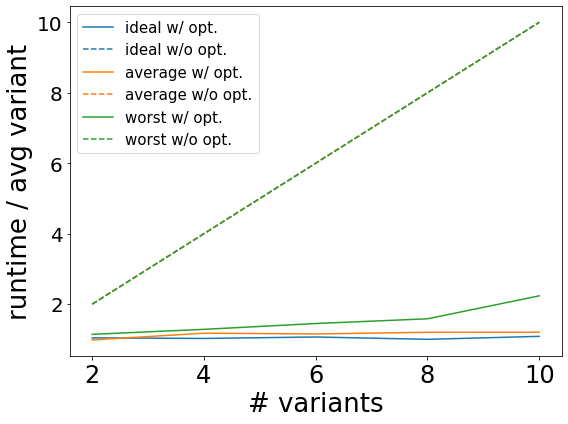

In [4]:
optimization = "common_subexpression_elimination"
variant_counts = [2, 4, 6, 8, 10]
row_count = "2000"
ideal_df = load_csf_result_data(optimization, "ideal", variant_counts, row_count)
average_df = load_csf_result_data(optimization, "average", variant_counts, row_count)
worst_df = load_csf_result_data(optimization, "worst", variant_counts, row_count)
plot_runtimes({'ideal': (ideal_df['analysis_result_with_opt'], ideal_df['analysis_result_without_any_opt']),
               'average': (average_df['analysis_result_with_opt'], average_df['analysis_result_without_any_opt']),
               'worst': (worst_df['analysis_result_with_opt'], worst_df['analysis_result_without_any_opt'])},
              variant_counts,
              f"{optimization}_variant_counts")

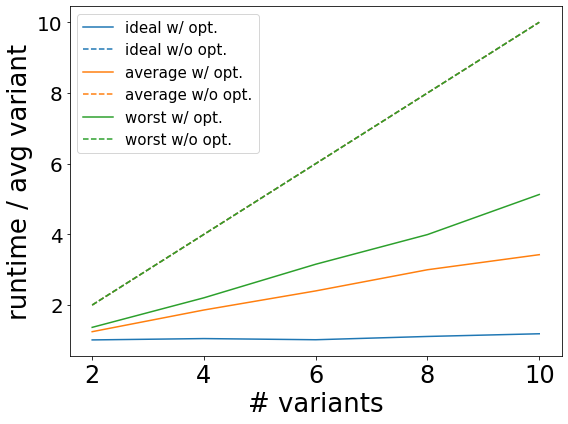

In [5]:
optimization = "projection_push_up"
variant_counts = [2, 4, 6, 8, 10]
row_count = "2000"
ideal_df = load_csf_result_data(optimization, "ideal", variant_counts, row_count)
average_df = load_csf_result_data(optimization, "average", variant_counts, row_count)
worst_df = load_csf_result_data(optimization, "worst", variant_counts, row_count)
plot_runtimes({'ideal': (ideal_df['analysis_result_with_opt_rule'], ideal_df['analysis_result_without_any_opt']),
               'average': (average_df['analysis_result_with_opt_rule'], average_df['analysis_result_without_any_opt']),
               'worst': (worst_df['analysis_result_with_opt_rule'], worst_df['analysis_result_without_any_opt'])},
              variant_counts,
              f"{optimization}_variant_counts")

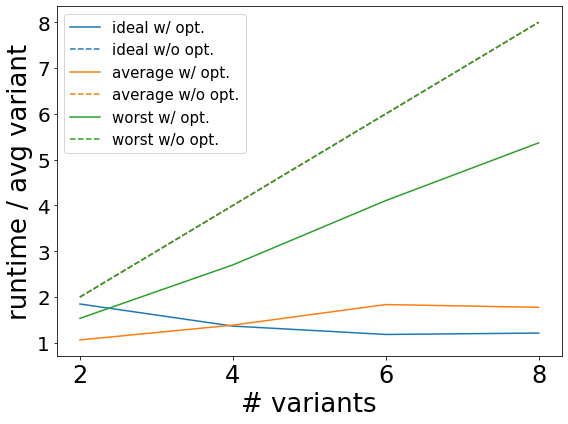

In [6]:
optimization = "udf_split_and_reuse"
variant_counts = [2, 4, 6, 8]
row_count = "10000"
ideal_df = load_csf_result_data(optimization, "ideal", variant_counts, row_count)
average_df = load_csf_result_data(optimization, "average", variant_counts, row_count)
worst_df = load_csf_result_data(optimization, "worst_w_safety", variant_counts, row_count)
plot_runtimes({'ideal': (ideal_df['analysis_result_with_reuse_opt_rule'], ideal_df['analysis_result_without_any_opt']),
               'average': (average_df['analysis_result_with_reuse_opt_rule'], average_df['analysis_result_without_any_opt']),
               'worst': (worst_df['analysis_result_with_reuse_opt_rule'], worst_df['analysis_result_without_any_opt'])},
              variant_counts,
              f"{optimization}_variant_counts")

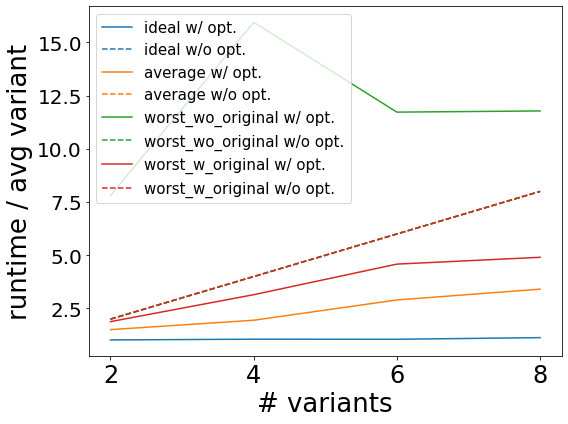

In [7]:
optimization = "filter_addition_push_up"
variant_counts = [2, 4, 6, 8]
row_count = "5000"
ideal_df = load_csf_result_data(optimization, "ideal", variant_counts, row_count)
average_df = load_csf_result_data(optimization, "average", variant_counts, row_count)
worst_wo_original_df = load_csf_result_data(optimization, "worst_wo_original", variant_counts, row_count)
worst_w_original_df = load_csf_result_data(optimization, "worst_w_original", variant_counts, row_count)
plot_runtimes({'ideal': (ideal_df['analysis_result_with_opt_rule'], ideal_df['analysis_result_without_any_opt']),
               'average': (average_df['analysis_result_with_opt_rule'], average_df['analysis_result_without_any_opt']),
               'worst_wo_original': (worst_wo_original_df['analysis_result_with_opt_rule'], worst_wo_original_df['analysis_result_without_any_opt']),
               'worst_w_original': (worst_w_original_df['analysis_result_with_opt_rule'], worst_w_original_df['analysis_result_without_any_opt'])},
              variant_counts,
              f"{optimization}_variant_counts")

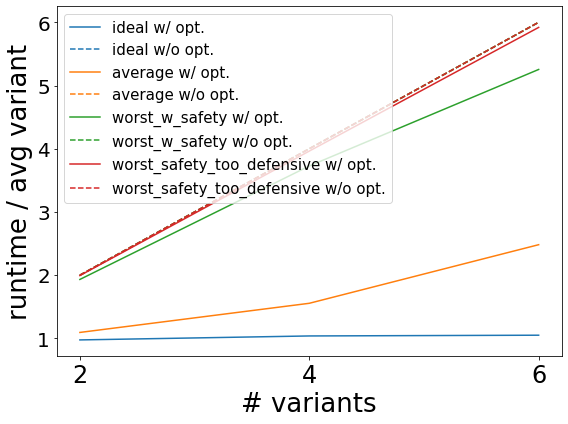

In [8]:
optimization = "operator_deletion_filter_push_up"
variant_counts = [2, 4, 6]
row_count = "2000"
ideal_df = load_csf_result_data(optimization, "ideal", variant_counts, row_count)
average_df = load_csf_result_data(optimization, "average", variant_counts, row_count)
worst_wo_safety_df = load_csf_result_data(optimization, "worst_wo_safety", variant_counts, row_count)
worst_w_safety_df = load_csf_result_data(optimization, "worst_w_safety", variant_counts, row_count)
worst_safety_too_defensive_df = load_csf_result_data(optimization, "worst_safety_too_defensive", variant_counts, row_count)
worst_case_only_some_filters_worth_pushing_up_df = load_csf_result_data(optimization, "worst_case_only_some_filters_worth_pushing_up", variant_counts, row_count)
plot_runtimes({'ideal': (ideal_df['analysis_result_with_opt_rule'], ideal_df['analysis_result_without_any_opt']),
               'average': (average_df['analysis_result_with_opt_rule'], average_df['analysis_result_without_any_opt']),
               #'worst_wo_safety_df': (worst_wo_safety_df['analysis_result_with_opt_rule'], worst_wo_safety_df['analysis_result_without_any_opt']),
               'worst_w_safety': (worst_w_safety_df['analysis_result_with_opt_rule'], worst_w_safety_df['analysis_result_without_any_opt']),
               'worst_safety_too_defensive': (worst_safety_too_defensive_df['analysis_result_with_opt_rule'], worst_safety_too_defensive_df['analysis_result_without_any_opt']),
               #'worst_case_only_some_filters_worth_pushing_up': (worst_case_only_some_filters_worth_pushing_up_df['analysis_result_with_opt_rule'], worst_case_only_some_filters_worth_pushing_up_df['analysis_result_without_any_opt'])
               },
              variant_counts,
              f"{optimization}_variant_counts")
